In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import os

In [2]:
file_path = os.path.join(os.getcwd(), '2016.csv')
df = pd.read_csv(file_path)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Data cleaning

In [3]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [4]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
df.replace(r'^\s*$', np.nan, regex = True, inplace = True)

In [6]:
missing_columns = df.columns[df.isnull().any()].tolist()
missing_columns

[]

Perform exploratory data analysis:

In [7]:
top_10_country = df.sort_values(by= 'Economy (GDP per Capita)', ascending = False).head(10)
top_10_country

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
35,Qatar,Middle East and Northern Africa,36,6.375,6.178,6.572,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224
19,Luxembourg,Western Europe,20,6.871,6.804,6.938,1.69752,1.03999,0.84542,0.54870,0.35329,0.27571,2.11055
21,Singapore,Southeastern Asia,22,6.739,6.674,6.804,1.64555,0.86758,0.94719,0.48770,0.46987,0.32706,1.99375
40,Kuwait,Middle East and Northern Africa,41,6.239,6.154,6.324,1.61714,0.87758,0.63569,0.43166,0.23669,0.15965,2.28085
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
27,United Arab Emirates,Middle East and Northern Africa,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
74,Hong Kong,Eastern Asia,75,5.458,5.362,5.554,1.51070,0.87021,0.95277,0.48079,0.31647,0.40097,0.92614
12,United States,North America,13,7.104,7.020,7.188,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782
33,Saudi Arabia,Middle East and Northern Africa,34,6.379,6.287,6.471,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457,2.61482


Identify the GDP per capita and Healthy Life Expectancy of the top 10 countries

In [8]:
fig = go.Figure()
fig.add_trace(go.Bar(x = top_10_country['Country'], y = top_10_country['Economy (GDP per Capita)'], name = 'Economy (GDP per Capita)'))
fig.update_layout(title = 'Top 10 Economy (GDP per Capita)', yaxis_title = 'Economy (GDP per Capita)')
fig.add_trace(go.Bar(x = top_10_country['Country'], y = top_10_country['Health (Life Expectancy)'], name = 'Health (Life Expectancy)'))
fig.update_layout(title = 'Top 10 Health (Life Expectancy)', yaxis_title = 'Health (Life Expectancy)')
fig.show()

Correlation analysis

In [9]:
cols = df.select_dtypes(include = ['float64', 'int64']).columns
df_corr = df[cols].corr()
df_corr

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


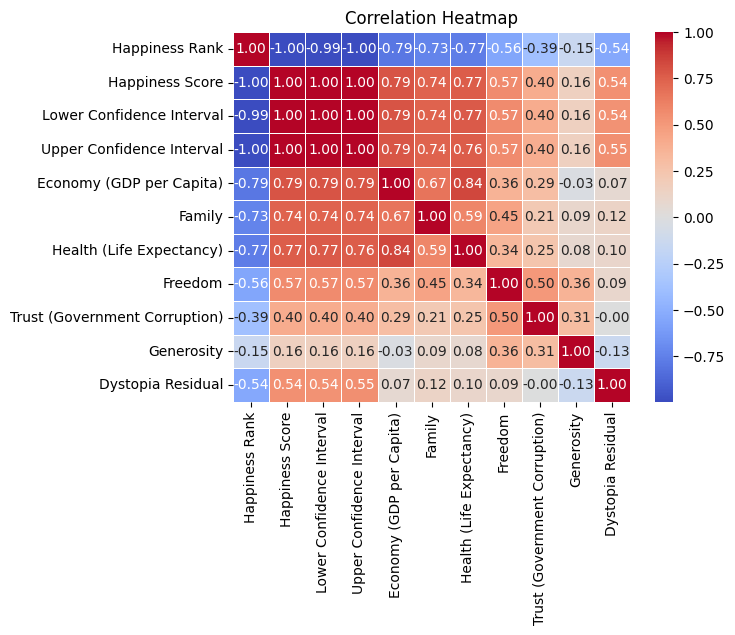

In [10]:
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

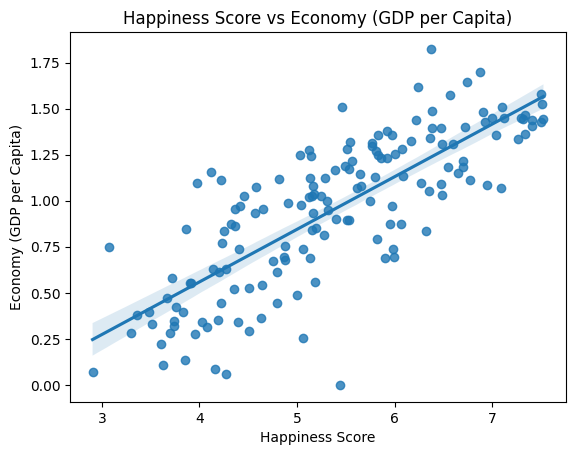

In [11]:
sns.regplot(x = 'Happiness Score', y = 'Economy (GDP per Capita)', data = df)
plt.title('Happiness Score vs Economy (GDP per Capita)')
plt.show()

In [12]:
from scipy import stats
corr, p_value = stats.pearsonr(df['Happiness Score'], df['Economy (GDP per Capita)'])
print(f'Correlation: {corr}')
print(f'P-value: {p_value}')

Correlation: 0.7903220167261058
P-value: 8.494371735008204e-35


- There is a strong positive linear relationship between Happiness Score and Economy (GDP per Capita)
- There is a meaningful relationship between these 2 variables

Identify the effect of GDP per capita on Happiness Score in various Regions

In [13]:
fig1 = px.scatter(df, x = 'Economy (GDP per Capita)', y = 'Happiness Score', color = 'Region', hover_name = 'Region', title = 'Economy (GDP per Capita) vs Happiness Score')
fig1.show()

In [14]:
fig2 = go.Figure()
fig2.add_trace(go.Pie(labels = df['Region'], values = df['Happiness Score'], hole = 0.3))
fig2.update_layout(title = 'Happiness Score by region')
fig2.show()

In [15]:
fig3 = px.choropleth(df, locations = 'Country', locationmode = 'country names', color = 'Economy (GDP per Capita)', hover_name = 'Health (Life Expectancy)', title = 'Economy (GDP per Capita) vs Health (Life Expectancy)')
fig3.show()

DASHBOARD using Dash

In [17]:
import dash
from dash import dcc
from dash import html

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children="My Dashboard", style={'textAlign': 'center', 'color': '#7FDBFF'}),

    html.Div(children='''
        Economy (GDP per Capita) vs Happiness Score
    ''', style={'textAlign': 'center', 'color': '#7FDBFF'}),

    dcc.Graph(
        id='graph1',
        figure=fig
    ),

    html.Div(children='''
        Region Distribution
    ''', style={'textAlign': 'center', 'color': '#7FDBFF'}),

    dcc.Graph(
        id='graph2',
        figure=fig1
    ),

    html.Div(children='''
        Economy (GDP per Capita) vs Health (Life Expectancy)
    ''', style={'textAlign': 'center', 'color': '#7FDBFF'}),

    dcc.Graph(
        id='graph3',
        figure=fig2
    ),

        html.Div(children='''
        Map
    ''', style={'textAlign': 'center', 'color': '#7FDBFF'}),

    dcc.Graph(
        id='graph4',
        figure=fig3
    )
])

if __name__ == '__main__':
    app.run_server(debug=True, mode='inline')